<img align="right" src="https://www.tedu.edu.tr/themes/custom/tedu/logo.svg" width="350px" height="350px"/>
<h1 style="font-size:20pt">Information Retrieval Project | Web Scraping </h1><br/>
<b> Author: </b> Cem Koçak <br/>
<b> Created: </b>10 December 2022<br/>
<b>Version: </b>v1.0<br/>

Note: Below **3** lines are kept to assist in my future studies

In [1]:
# kod deneme sayfası https://www.cankaya.edu.tr
# usefull link: https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/
#Cem not sonra sil:  \<a\> ile anchor tag'i escape'liyerek yazabilirsin

#Understand the Find() function in Beautiful Soup
#https://stackoverflow.com/questions/34301815/understand-the-find-function-in-beautiful-soup

#Bs4 select_one vs find
#https://stackoverflow.com/questions/39033612/bs4-select-one-vs-find

#how to get text after a specific p tag in beautifulsoup?
#https://stackoverflow.com/questions/64970961/how-to-get-text-after-a-specific-p-tag-in-beautifulsoup

#How to find elements by class
#https://stackoverflow.com/questions/5041008/how-to-find-elements-by-class

#How to embed image or picture in jupyter notebook, either from a local machine or from a web resource?
#https://stackoverflow.com/questions/32370281/how-to-embed-image-or-picture-in-jupyter-notebook-either-from-a-local-machine-o

#Jupyternotebook cheatsheat:
#https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet

#add-table-contents-jupyter-notebook
#https://linuxhint.com/add-table-contents-jupyter-notebook/

In [2]:
# cok bakmadıgım bulunsun dedigim linkler
#https://stackoverflow.com/questions/6447045/css3-selector-first-of-type-with-class-name
#https://developers.google.com/edu/python/regular-expressions
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html

#bulunsun dedigim komutlar
#(temporarySoup.select_one("div p:nth-of-type(2)").text)
#temporarySoup.select_one(:nth-of-type(n)
#<font size="5">

If the pages are formatted consistently ( just looked over one), you could also use something like

soup.find('div',{'id':'ctl00_PlaceHolderMain_RichHtmlField1__ControlWrapper_RichHtmlField'})

<font size="5"> **This is the story part of the project**
<br>
    <br>
    <br>
<font size="3"> **I really liked the current state of the project as it was well organized and since I might use
    this notebook later for future reading/learning I didnt want to cluster it with the story so I am writing the
    story here**

Finding an item to buy from websites with little or none search/sort functionality is a hastle such as the older version of letgo. To make this process easier the user can just the system below that has the core functionality now but can be developped to become a fully functioning book search system. <br>
Not all the possible functions were added and getting the book description was removed to make the notebook simpler but an example version exists on part 3.5(check table of contents).
Currently the system has 3 functions: Name Search, Genre Search and Book Cover Printer which work in the following way respectively:
User can enter name of the books he wants and the system checks if that book exists and is avaiable on stock on the web upon which if it is, the user recieves the information regarding the price and in stock avaliability of the book.
User can also search by the spesific genre he is interested in to see a list of books avaliable on the website along with price, stock amount and rating of the book.
User can also see the cover of the book he wishes but will get a notification instead if a cover is unavaliabe. This can be caused by the name of the book not existing in the website or the book that exists in the website doesnt have a cover on the website.

Since this is a demo-book site it took many different python methods & knowledge to scrape various information as the page was designed to include extreme/extreme-like cases on the web design to challange scrappers.

## Table of Contents
* [1. Setup](#1)
    * [1.1 Import Required Packages](#1.1)
    * [1.2 Define page URL, extract page content and parse HTML](#1.2)
    * [1.3 Checking robots.txt file and link extraction from the URL](#1.3)
* [2. Webcrawling to find every single unique book page in the website](#2)
    * [2.1 Indexing every page that contain list of books](#2.1)
    * [2.2 Using indexed pages to find every single unique book page in the website](#2.2)
* [3. Using BeautifulSoup and finding various atributes of a sample page](#3)
    * [3.1 Wrangling HTML With BeautifulSoup](#3.1)
    * [3.2 Find the right table to scrap](#3.2)
    * [3.3 Find The Number of Columns and Rows](#3.3)
    * [3.4 Get Table Header Attributes](#3.4)
    * [3.5 Get Product Description](#3.5)
    * [3.6 Get Star Rating](#3.6)
    * [3.7 Get the Name of the Book](#3.7)
    * [3.8 Get the Genre of the Book](#3.8)
    * [3.9 Printing the Cover of the Book](#3.9)
* [4. Using BeautifulSoup and indexed pages to collect information on all books](#4)
* [5. Data Preprocessing](#5)
    * [5.1 Parsing the Data Types and Removing Unnecessary Columns](#5.1)
* [6. Data Visualization](#6)
* [7. User Functions](#7)
    * [7.1 Book Search Based On Genre](#7.1)
    * [7.2 Book Search Based On Name](#7.2)
    * [7.3 Book Cover Printer](#7.3)
* [8. References](#8)

## 1. Setup <a class="anchor" id="1"></a>

### 1.1 Import Required Packages <a class="anchor" id="1.1"></a>

In [3]:
# for performing your HTTP requests
import requests  

# for xml & html scrapping 
from bs4 import BeautifulSoup 

# for analysis
import pandas as pd

# Time
import time

#Visuals
import matplotlib.pyplot as plt

#For image display
from IPython.display import Image

### 1.2 Define page URL, extract page content and parse HTML <a class="anchor" id="1.2"></a>

In [294]:
URL = "http://books.toscrape.com"
page = requests.get(URL ,timeout=10)
soup = BeautifulSoup(page.text, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en-us">
 <!--<![endif]-->
 <head>
  <title>
   All products | Books to Scrape - Sandbox
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="content-type"/>
  <meta content="24th Jun 2016 09:29" name="created"/>
  <meta content="" name="description"/>
  <meta content="width=device-width" name="viewport"/>
  <meta content="NOARCHIVE,NOCACHE" name="robots"/>
  <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->
  <!--[if lt IE 9]>
        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>
        <![endif]-->
  <link href="static/oscar/favicon.ico" rel="shortcut icon"/>
  <link href="static/oscar/css/styles.css" rel="stylesheet" type="tex

### 1.3 Checking robots.txt file and link extraction from the URL <a class="anchor" id="1.3"></a>

Finding the content of robots.txt file

In [5]:
robotTxtFile=requests.get(URL+str("/robots.txt"))
if robotTxtFile.status_code==200:
    soupR = BeautifulSoup(robotTxtFile.text, "html.parser")
    print("Here is the rules of the website")
    print(soupR.prettify())
elif robotTxtFile.status_code==404:
    print("No robotTxtFile Yeeey!")
else:
    print("something has gone wrong please fix things based on error code: "+str(robotTxtFile))

No robotTxtFile Yeeey!


Extracting all the links found within URL using hyperlink

In [6]:
for link in soup.find_all('a'):
    print(link.get('href'))

index.html
index.html
catalogue/category/books_1/index.html
catalogue/category/books/travel_2/index.html
catalogue/category/books/mystery_3/index.html
catalogue/category/books/historical-fiction_4/index.html
catalogue/category/books/sequential-art_5/index.html
catalogue/category/books/classics_6/index.html
catalogue/category/books/philosophy_7/index.html
catalogue/category/books/romance_8/index.html
catalogue/category/books/womens-fiction_9/index.html
catalogue/category/books/fiction_10/index.html
catalogue/category/books/childrens_11/index.html
catalogue/category/books/religion_12/index.html
catalogue/category/books/nonfiction_13/index.html
catalogue/category/books/music_14/index.html
catalogue/category/books/default_15/index.html
catalogue/category/books/science-fiction_16/index.html
catalogue/category/books/sports-and-games_17/index.html
catalogue/category/books/add-a-comment_18/index.html
catalogue/category/books/fantasy_19/index.html
catalogue/category/books/new-adult_20/index.htm

The \<article\> HTML element represents a self-contained composition in a document, page, application, or site, which is intended to be independently distributable or reusable (e.g., in syndication)

**source**  https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a

## 2. Webcrawling to find every single unique book page in the website <a class="anchor" id="2"></a>

### 2.1 Indexing every page that contain list of books <a class="anchor" id="2.1"></a>

After clicking on the books button on the right and navigation has made with next previous buttons the page becomes: http://books.toscrape.com/catalogue/category/books_1/page-1.html
and "page-1" part changes every time the next button is used until page-50

In [7]:
bookPagesHtmlList=[]
for i in range(1,51):
    bookPagesHtmlList.append("https://books.toscrape.com/catalogue/category/books_1/page-"+ str(i)+".html")
print(bookPagesHtmlList)

['https://books.toscrape.com/catalogue/category/books_1/page-1.html', 'https://books.toscrape.com/catalogue/category/books_1/page-2.html', 'https://books.toscrape.com/catalogue/category/books_1/page-3.html', 'https://books.toscrape.com/catalogue/category/books_1/page-4.html', 'https://books.toscrape.com/catalogue/category/books_1/page-5.html', 'https://books.toscrape.com/catalogue/category/books_1/page-6.html', 'https://books.toscrape.com/catalogue/category/books_1/page-7.html', 'https://books.toscrape.com/catalogue/category/books_1/page-8.html', 'https://books.toscrape.com/catalogue/category/books_1/page-9.html', 'https://books.toscrape.com/catalogue/category/books_1/page-10.html', 'https://books.toscrape.com/catalogue/category/books_1/page-11.html', 'https://books.toscrape.com/catalogue/category/books_1/page-12.html', 'https://books.toscrape.com/catalogue/category/books_1/page-13.html', 'https://books.toscrape.com/catalogue/category/books_1/page-14.html', 'https://books.toscrape.com/

Double checking to make sure pages 1-50 exists and returns a response while page 51 doesnt exist(pages stop at 50).

In [8]:
for i in range(1,52):
    bookPages_response= requests.get("https://books.toscrape.com/catalogue/category/books_1/page-"+ str(i)+".html")
    if bookPages_response.status_code!= 200:
        print(str(i)+" th page doesnt respond with 200!")
print("other pages respond with 200!")

51 th page doesnt respond with 200!
other pages respond with 200!


As an example of these pages here is the page 1

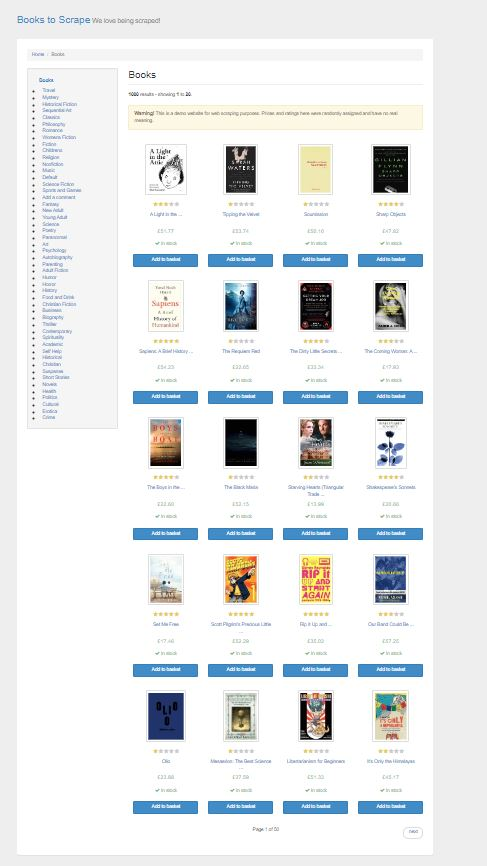


Here is an example of a unique book page that was chosen by being the first book in the first of the list pages

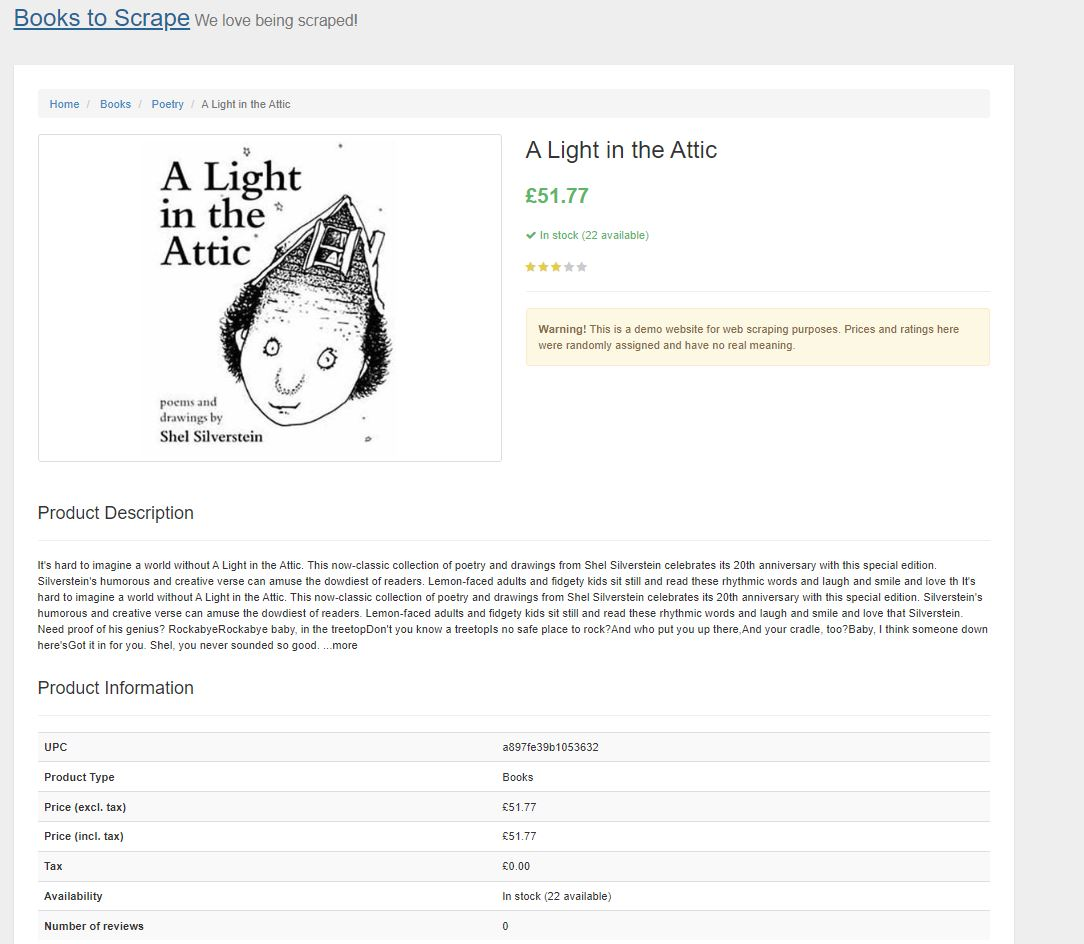

## 2.2 Using indexed pages to find every single unique book page in the website <a class="anchor" id="2.2"></a>

From inspection books have artical class => product_pod
and book category buttons have u1 class => nav nav-list <br>
This information will be used to filter results below

In [9]:
bookPageList=[]
for pageNum in bookPagesHtmlList:
    temporaryPage=requests.get(pageNum)
    temporarySoup=BeautifulSoup(temporaryPage.text, 'html.parser')
    temporaryBookResults = temporarySoup.find_all(attrs={'class':'product_pod'})
    for result in temporaryBookResults:
        bookPageList.append(URL+"/catalogue"+result.h3.a.get('href')[5:])
len(bookPageList)

1000

In [10]:
for i in range(20):
    print(bookPageList[i])

http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html
http://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html
http://books.toscrape.com/catalogue/soumission_998/index.html
http://books.toscrape.com/catalogue/sharp-objects_997/index.html
http://books.toscrape.com/catalogue/sapiens-a-brief-history-of-humankind_996/index.html
http://books.toscrape.com/catalogue/the-requiem-red_995/index.html
http://books.toscrape.com/catalogue/the-dirty-little-secrets-of-getting-your-dream-job_994/index.html
http://books.toscrape.com/catalogue/the-coming-woman-a-novel-based-on-the-life-of-the-infamous-feminist-victoria-woodhull_993/index.html
http://books.toscrape.com/catalogue/the-boys-in-the-boat-nine-americans-and-their-epic-quest-for-gold-at-the-1936-berlin-olympics_992/index.html
http://books.toscrape.com/catalogue/the-black-maria_991/index.html
http://books.toscrape.com/catalogue/starving-hearts-triangular-trade-trilogy-1_990/index.html
http://books.toscrape.com/cata

**Lists that will contain usefull information of books**

Most of these lists will be used to create a dataframe later on

In [11]:
name=[]
rating=[]
product_description=[]
UPC=[]
product_type=[]
price=[]
price_pretax=[]
tax=[]
stock_amount=[]
reviews=[]
genre=[]
coverURL=[]

Notes:
UPC: UPC stands for “universal product code.” It’s a barcode that is widely used throughout the world to help stores track items, sales counts, inventories, and other information about specific products. When incorporated with a book, the barcode is able to track the sales of a specific edition and variation while providing purchasing price information

## 3. Using BeautifulSoup and finding various atributes of a sample page <a class="anchor" id="3"></a>

### 3.1 Wrangling HTML With BeautifulSoup <a class="anchor" id="3.1"></a>

In [12]:
temporaryPage=requests.get(bookPageList[0])
temporarySoup=BeautifulSoup(temporaryPage.text, 'html.parser')
all_tables=temporarySoup.find_all('table')

In [13]:
for table in all_tables:
     if table.findParent("table") is None:
         print(str(table))

<table class="table table-striped">
<tr>
<th>UPC</th><td>a897fe39b1053632</td>
</tr>
<tr>
<th>Product Type</th><td>Books</td>
</tr>
<tr>
<th>Price (excl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Price (incl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Tax</th><td>Â£0.00</td>
</tr>
<tr>
<th>Availability</th>
<td>In stock (22 available)</td>
</tr>
<tr>
<th>Number of reviews</th>
<td>0</td>
</tr>
</table>


### 3.2 Find the right table to scrap <a class="anchor" id="3.2"></a>

In [14]:
# There is only 1 table
right_table=temporarySoup.find('table', {"class":'table table-striped'})
right_table

<table class="table table-striped">
<tr>
<th>UPC</th><td>a897fe39b1053632</td>
</tr>
<tr>
<th>Product Type</th><td>Books</td>
</tr>
<tr>
<th>Price (excl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Price (incl. tax)</th><td>Â£51.77</td>
</tr>
<tr>
<th>Tax</th><td>Â£0.00</td>
</tr>
<tr>
<th>Availability</th>
<td>In stock (22 available)</td>
</tr>
<tr>
<th>Number of reviews</th>
<td>0</td>
</tr>
</table>

### 3.3 Find The Number of Columns and Rows <a class="anchor" id="3.3"></a>

The number of columns in the table: right_table

In [15]:
for row in right_table.findAll("tr"):
    cells = row.findAll('td')

len(cells)

1

The number of rows in the table: right_table

In [16]:
len(right_table.find_all('th'))

7

### 3.4 Get Table Header Attributes <a class="anchor" id="3.4"></a>

In [17]:
for i in range(len(right_table.find_all('th'))):
    print(right_table.find_all('td')[i].text)

a897fe39b1053632
Books
Â£51.77
Â£51.77
Â£0.00
In stock (22 available)
0


In [18]:
for i in range(len(right_table.find_all('th'))):
    if i==0 or i==1 or i==6:
        print("atribute(header row) of "+str(right_table.find_all('th')[i].text)+" has the value(data row) of " \
            +str(right_table.find_all('td')[i].text) )
    elif i>1 and i<5:
        print("atribute(header row) of "+str(right_table.find_all('th')[i].text)+" has the value(data row) of " \
            +str(right_table.find_all('td')[i].text.strip("Â£")) )
    else: # for i=5
        print("atribute(header row) of "+str(right_table.find_all('th')[i].text)+" has the value(data row) of " \
            +str(right_table.find_all('td')[i].text.strip("In stock ( available)")) )

atribute(header row) of UPC has the value(data row) of a897fe39b1053632
atribute(header row) of Product Type has the value(data row) of Books
atribute(header row) of Price (excl. tax) has the value(data row) of 51.77
atribute(header row) of Price (incl. tax) has the value(data row) of 51.77
atribute(header row) of Tax has the value(data row) of 0.00
atribute(header row) of Availability has the value(data row) of 22
atribute(header row) of Number of reviews has the value(data row) of 0


### 3.5 Get Product Description <a class="anchor" id="3.5"></a>

As with any keyword argument, you can pass class_ a string, a regular expression, a function, or True <br>
Source: https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-by-css-class

In [19]:
temporarySoup.find('p',class_=None).text

"It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you never sounde

### 3.6 Get Star Rating <a class="anchor" id="3.6"></a>

In [20]:
print(temporarySoup.find_all('p'))

[<p class="price_color">Â£51.77</p>, <p class="instock availability">
<i class="icon-ok"></i>
    
        In stock (22 available)
    
</p>, <p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<!-- <small><a href="/catalogue/a-light-in-the-attic_1000/reviews/">
        
                
                    0 customer reviews
                
        </a></small>
         --> 


<!-- 
    <a id="write_review" href="/catalogue/a-light-in-the-attic_1000/reviews/add/#addreview" class="btn btn-success btn-sm">
        Write a review
    </a>

 --></p>, <p>It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhyth

In [21]:
print(temporarySoup.find_all('p')[2].get('class'))

['star-rating', 'Three']


In [22]:
print(temporarySoup.find('p',class_="star-rating").get('class')[1])

Three


### 3.7 Get the Name of the Book <a class="anchor" id="3.7"></a>

In [23]:
(temporarySoup.find('div', {"class": "col-sm-6 product_main"}).h1).text

'A Light in the Attic'

### 3.8 Get the Genre of the Book <a class="anchor" id="3.8"></a>

In [24]:
print(temporarySoup.find('ul', {"class": "breadcrumb"}).find_all('a')[2].text)

Poetry


### 3.9 Printing the Cover of the Book <a class="anchor" id="3.9"></a>

In [26]:
cover=temporarySoup.find('img').get('src')[5:]

In [27]:
URL

'http://books.toscrape.com'

In [28]:
cover

'/media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg'

In [29]:
Image(url= URL+cover)

## 4. Using BeautifulSoup and indexed pages to collect information on all books <a class="anchor" id="4"></a>

After some errors I have found that there might be books without a description to check this theory I have executed the code below which resulted in finding out that there is atleast 1 book without a description(I stopped execution after first "no description" print as I dont need the exact number)

In [30]:
# Its unnecesarry to run this cell
# This cell only exists to provide information on how i obtained knowledge that there is atleast 1 book
# which does not have description
for i in range(len(bookPageList)):
    temporaryPage=requests.get(bookPageList[i])
    temporarySoup=BeautifulSoup(temporaryPage.text, 'html.parser')
    try:
        print((temporarySoup.find('p',class_=None).text)[0])
    except:
        print("no description")

I
"
D
W
F
P
D
"
F
P
S
T
A
S
P
T
P
A
L
â
A
H
C
A
N
B
A
P
A
B
I
A
M
O
A
S
T
I
T
A
T
I
P
T
F
W
T
M
I
A
A
D
C
E
O
A
A
T
A
O
E
G
R
I
D
S
W
D
D
I
O
T
C
M
A
â
A
M
F
H
T
J
"
J
P
N
A
I
I
S
A
T
C
W
F
T
I
D
W
T
A
F
T
I
O
S
A
C
D
W
A
E
"
"
B
T
A
B
E
C
A
T
I
B
O
E
A
W
Y
M
â
S
A
F
C
A
F
A
N
T
A
F
I
T
W
E
W
T
I
H
W
S
I
K
A
B
T
B
T
W
no description
"
C
A
C
M
K
W
F
I
W
*
M
Y
C
T
F
A
â
A
N
A
A
O
A
P
T
M
G
A
W
I
O
A
W
E
F
I
V
D
T
R
A
F
R
â
W
T
T
I
L
A
S
C
A
F
W
F
T
â
B
E
T
T
"
T
O
F
'
1
F
T
P
N
I
P
F
T
G
A
A
F
R
G
I
A
I
H
H
S
W
â
B
â
F
T
S
A
S
A
W
S
A
F
H
P
T
P
T
S
I
R
G
T
S
#
I
I
B
N
A
F
D
I
C
M
L
H
T
I
â
L
Y
I
F
T
N
A
T
A
I
L
A
W
F
E
F
I
A
S
T
V
O
1
S
M
D
T
H
C
I
I
A
T
W
A
W
O
A
C
â
A
T
#
#
B
R
T
W
W
W
A
I
J
I
A
K
A
B
F
I
H
G
H
N
T
M
T
F
I
A
A
A
D
C
T
D
F
T
S
1
F
T
T
G
I
M
L
J
F
I
I
I
W
T
T
H
B
B
A
T
T
W
A
T
A
A
O
A
W
F
B
F
I
D
"
T
A
S
â
F
T
T
A
I
O
P
L
A
T
E
T
R
C
M
Y
A
R
F
T
T
W
F
F
Y
I
I
F
D
B
A
"
T
E
"
I
I
T
W
H
W
A
A
I
A
E
W
A
T
P
F
T
L
A
T
"
F
P
T
E
P
A
N
S
W
A
â
B
T
N
A
W
A
I
T
S
T
â
I
A
F
T
B
E

In [31]:
for i in range(len(bookPageList)):
    temporaryPage=requests.get(bookPageList[i])
    temporarySoup=BeautifulSoup(temporaryPage.text, 'html.parser')
    all_tables=temporarySoup.find_all('table')
    
    right_table=temporarySoup.find('table', {"class":'table table-striped'})
    
    UPC.append(right_table.find_all('td')[0].text)
    product_type.append(right_table.find_all('td')[1].text)
    price_pretax.append(right_table.find_all('td')[2].text.strip("Â£"))
    price.append(right_table.find_all('td')[3].text.strip("Â£"))
    tax.append(right_table.find_all('td')[4].text.strip("Â£"))
    stock_amount.append(right_table.find_all('td')[5].text.strip("In stock ( available)"))
    reviews.append(right_table.find_all('td')[6].text)
    
    try:
        product_description.append((temporarySoup.find('p',class_=None).text))
    except:
        product_description.append("No description was avaliable on the website")
    
    rating.append(temporarySoup.find('p',class_="star-rating").get('class')[1])
    coverURL.append(temporarySoup.find('img').get('src')[5:])
    name.append(temporarySoup.find('div', {"class": "col-sm-6 product_main"}).h1.text)
    genre.append(temporarySoup.find('ul', {"class": "breadcrumb"}).find_all('a')[2].text)
    

In [32]:
# dictionary of lists 
dictOfLists = {'name': name, 'UPC': UPC, 'product_type': product_type ,'price_pretax': price_pretax ,'price': price ,\
              'tax':tax, 'stock_amount':stock_amount, 'reviews':reviews, 'product_description':product_description, \
              'rating':rating, 'coverURL':coverURL,'genre':genre} 
    

In [33]:
#To check there is no loss of data for any of the 1000 book
for key in dictOfLists:
    print(len(dictOfLists[key]))

1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000


In [34]:
df = pd.DataFrame(dictOfLists)

## 5. Data Preprocessing <a class="anchor" id="5"></a>

Copying data to preserve the original

In [35]:
df_books = df.copy()

In [36]:
df_books.head()

,name,UPC,product_type,price_pretax,price,tax,stock_amount,reviews,product_description,rating,coverURL,genre
0,A Light in the Attic,a897fe39b1053632,Books,51.77,51.77,0.00,22,0,It's hard to imagine a world without A Light i...,Three,/media/cache/fe/72/fe72f0532301ec28892ae79a629...,Poetry
1,Tipping the Velvet,90fa61229261140a,Books,53.74,53.74,0.00,20,0,"""Erotic and absorbing...Written with starling ...",One,/media/cache/08/e9/08e94f3731d7d6b760dfbfbc02c...,Historical Fiction
2,Soumission,6957f44c3847a760,Books,50.10,50.10,0.00,20,0,"Dans une France assez proche de la nÃ´tre, un ...",One,/media/cache/ee/cf/eecfe998905e455df12064dba39...,Fiction
3,Sharp Objects,e00eb4fd7b871a48,Books,47.82,47.82,0.00,20,0,"WICKED above her hipbone, GIRL across her hear...",Four,/media/cache/c0/59/c05972805aa7201171b8fc71a5b...,Mystery
4,Sapiens: A Brief History of Humankind,4165285e1663650f,Books,54.23,54.23,0.00,20,0,From a renowned historian comes a groundbreaki...,Five,/media/cache/ce/5f/ce5f052c65cc963cf4422be096e...,History


In [37]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   name                 1000 non-null   object
 1   UPC                  1000 non-null   object
 2   product_type         1000 non-null   object
 3   price_pretax         1000 non-null   object
 4   price                1000 non-null   object
 5   tax                  1000 non-null   object
 6   stock_amount         1000 non-null   object
 7   reviews              1000 non-null   object
 8   product_description  1000 non-null   object
 9   rating               1000 non-null   object
 10  coverURL             1000 non-null   object
 11  genre                1000 non-null   object
dtypes: object(12)
memory usage: 93.9+ KB


### 5.1 Parsing the Data Types and Removing Unnecessary Columns <a class="anchor" id="5.1"></a>

<font size="4">Parsing the data types into correct type

In [38]:
df_books['name']=df_books['name'].astype(str)

Even though string valued columns have Dtype of object the elements have the type of string so no parsing is necessary for those columns. This is shown on the below 2 cells
source: https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes

In [39]:
df_books['name'].dtypes

dtype('O')

In [40]:
type(df_books['name'][0])

str

In [41]:
df_books['price']=df_books['price'].astype(float)

In [42]:
df_books['reviews']=df_books['reviews'].astype(int)

In [43]:
df_books['tax']=df_books['tax'].astype(float)

In [44]:
df_books['price_pretax']=df_books['price_pretax'].astype(float)

In [185]:
df_books['stock_amount']=df_books['stock_amount'].astype(int)

<font size="4">Removing Unnecessary Columns

From below analysis I found that every book has the review count of 0, tax and price_pretax value of 0.00 . And every product type is "Books" . This is very disappointing for me however I am not completely suprised as I used a demo book selling website to avoid getting banned by the website for scrapping.

In [45]:
len(df_books[df_books.reviews>0].count(axis=1))

0

In [46]:
len(df_books[df_books.tax>0.00].count(axis=1))

0

In [47]:
len(df_books.query('price!=price_pretax').count(axis=1))

0

In [48]:
df_books["stock_amount"].nunique()

21

I was suspicious of stock amount as well but from the above code it turned out fine!

In [49]:
df_books["product_type"].nunique()

1

In [50]:
df_books.drop(columns=["reviews","tax","price_pretax","product_type"],inplace=True)

In [51]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 1000 non-null   object 
 1   UPC                  1000 non-null   object 
 2   price                1000 non-null   float64
 3   stock_amount         1000 non-null   object 
 4   product_description  1000 non-null   object 
 5   rating               1000 non-null   object 
 6   coverURL             1000 non-null   object 
 7   genre                1000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [52]:
df_books

,name,UPC,price,stock_amount,product_description,rating,coverURL,genre
0,A Light in the Attic,a897fe39b1053632,51.77,22,It's hard to imagine a world without A Light i...,Three,/media/cache/fe/72/fe72f0532301ec28892ae79a629...,Poetry
1,Tipping the Velvet,90fa61229261140a,53.74,20,"""Erotic and absorbing...Written with starling ...",One,/media/cache/08/e9/08e94f3731d7d6b760dfbfbc02c...,Historical Fiction
2,Soumission,6957f44c3847a760,50.10,20,"Dans une France assez proche de la nÃ´tre, un ...",One,/media/cache/ee/cf/eecfe998905e455df12064dba39...,Fiction
3,Sharp Objects,e00eb4fd7b871a48,47.82,20,"WICKED above her hipbone, GIRL across her hear...",Four,/media/cache/c0/59/c05972805aa7201171b8fc71a5b...,Mystery
4,Sapiens: A Brief History of Humankind,4165285e1663650f,54.23,20,From a renowned historian comes a groundbreaki...,Five,/media/cache/ce/5f/ce5f052c65cc963cf4422be096e...,History
...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,cd2a2a70dd5d176d,55.53,1,No description was avaliable on the website,One,/media/cache/99/df/99df494c230127c3d5ff53153d1...,Classics
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",bfd5e1701c862ac3,57.06,1,High school student Kei Nagai is struck dead i...,Four,/media/cache/30/98/309814b6eeba469f4c741147aaa...,Sequential Art
997,A Spy's Devotion (The Regency Spies of London #1),19fec36a1dfb4c16,16.97,1,"In Englandâs Regency era, manners and elegan...",Five,/media/cache/f9/6b/f96b60a7614c4e3e868b82f6811...,Historical Fiction
998,1st to Die (Women's Murder Club #1),f684a82adc49f011,53.98,1,"James Patterson, bestselling author of the Ale...",One,/media/cache/f6/8e/f68e6ae2f9da04fccbde8442b0a...,Mystery


## 6. Data Visualization <a class="anchor" id="6"></a>

In [78]:
df_books.genre.value_counts()

Default               152
Nonfiction            110
Sequential Art         75
Add a comment          67
Fiction                65
Young Adult            54
Fantasy                48
Romance                35
Mystery                32
Food and Drink         30
Childrens              29
Historical Fiction     26
Poetry                 19
Classics               19
History                18
Horror                 17
Womens Fiction         17
Science Fiction        16
Science                14
Music                  13
Business               12
Thriller               11
Travel                 11
Philosophy             11
Humor                  10
Autobiography           9
Art                     8
Psychology              7
Religion                7
Spirituality            6
Christian Fiction       6
New Adult               6
Sports and Games        5
Biography               5
Self Help               5
Health                  4
Christian               3
Politics                3
Contemporary

In [130]:
pie=df_books.genre.value_counts()
others=pie[pie<29].sum()
others=pd.Series(others,index=['Others'])
pie=pie[pie>29]
pie=pd.concat([pie,others])
pie

Default           152
Nonfiction        110
Sequential Art     75
Add a comment      67
Fiction            65
Young Adult        54
Fantasy            48
Romance            35
Mystery            32
Food and Drink     30
Others            303
dtype: int64

<font size="4"> Pie Chart of the Books With Percentage Higher than 3

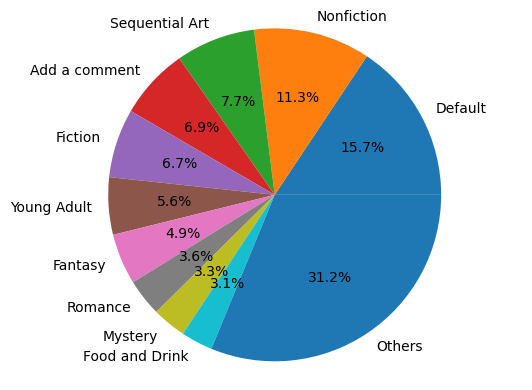

In [276]:
labels=pie.index
sizes=pie.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') #To make pie-chart a circle to avoid Skeuomorphism
plt.show()

<font size="4"> Pie Chart Showing Percentage of Star Reviews

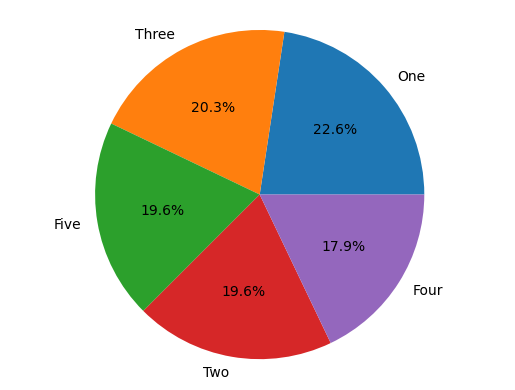

In [277]:
labels=df_books.rating.value_counts().index
sizes=df_books.rating.value_counts().values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal') #To make pie-chart a circle to avoid Skeuomorphism
plt.show()

## 7. User Functions <a class="anchor" id="7"></a>

### 7.1 Book Search Based On Genre <a class="anchor" id="7.1"></a>

You can use the below code for reference:

In [177]:
#This code will list the existing genre
#df_books.genre.values

In [267]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.width', 1000)
def bookNamePrinter1(Genre1):
    return(df_books[["name","price","stock_amount","rating"]][df_books.genre==Genre1])

In [268]:
Genre1= input("Enter Genre you want to search: ")
if Genre1 in df_books.genre.values:
    print("")
    print("Here are the name of the books of genre "+str(Genre1))
    print(bookNamePrinter1(Genre1))
else:
    print("Sorry that genre does not exist in this website")

Enter Genre you want to search: Default

Here are the name of the books of genre Default
                                                  name  price  stock_amount rating
7    The Coming Woman: A Novel Based on the Life of...  17.93            19  Three
8    The Boys in the Boat: Nine Americans and Their...  22.60            19   Four
10      Starving Hearts (Triangular Trade Trilogy, #1)  13.99            19    Two
26   America's Cradle of Quarterbacks: Western Penn...  22.50            19  Three
27                      Aladdin and His Wonderful Lamp  53.13            19  Three
35                                         Penny Maybe  33.29            18  Three
36      Maude (1883-1993):She Grew Up with the country  18.02            18    Two
65   The Inefficiency Assassin: Time Management Tac...  20.59            16   Five
74                                         Soul Reader  39.58            16    Two
117                                         Bossypants  49.46            16    Tw

### 7.2 Book Search Based On Name <a class="anchor" id="7.2"></a>

Here are some example book names that can be coppy pasted: <br>
Eat, Pray, Love   <br>
The End of the Jesus Era (An Investigation #1)   <br>
The Tumor   <br>

Since len(df_books[df_books.stock_amount==0]) returns 0 output none of the books are out of stock so that possibility wont be included in this code

In [197]:
len(df_books[df_books.stock_amount==0])

0

In [213]:
def bookNamePrinter2(Name1):
    return(df_books[["name","price","stock_amount"]][df_books.name==Name1])

In [217]:
Name1= input("Enter Name of the book you want to search: ")
if Name1 in df_books.name.values:
    print("")
    print("Here are the details of the book "+str(Name1))
    print("")
    print(bookNamePrinter2(Name1))
else:
    print("Sorry that book does not exist in this website")

Enter Name of the book you want to search: Eat, Pray, Love

Here are the details of the book Eat, Pray, Love

                name  price  stock_amount
984  Eat, Pray, Love  51.32             1


### 7.3 Book Cover Printer <a class="anchor" id="7.3"></a>

In [226]:
def bookCoverPrinter(index1):
    temporaryPage=requests.get(bookPageList[index1])
    temporarySoup=BeautifulSoup(temporaryPage.text, 'html.parser')
    cover=temporarySoup.find('img').get('src')[5:]
    return(URL+cover)

In [252]:
def bookCoverPrinter(index1):
    temporaryPage=requests.get(bookPageList[index1])
    temporarySoup=BeautifulSoup(temporaryPage.text, 'html.parser')
    cover=temporarySoup.find('img').get('src')[5:]
    return(cover)

Name2= input("Enter Name of the book you want to see the cover of: ")
if Name2 in df_books.name.values:
    print("")
    print("Here is the cover of "+str(Name2))
    print("")
    try:
        display(Image(url=URL+bookCoverPrinter((df_books[df_books.name==Name2].index)[0])))
    except:
        print("Sadly this book has no cover avaliable in the website")
else:
    print("Sorry that book does not exist in this website")

Enter Name of the book you want to see the cover of: The Tumor

Here is the cover of The Tumor



Note:
Since the below 2 codes both return 1000, all the books have a cover, the try except part was just added to showcase what i learned. Same applies to book description however those codes were not added to make this notebook less clustered.

In [256]:
df_books.coverURL.notnull().count()

1000

In [257]:
df_books.coverURL.nunique()

1000

### 8. References <a class="anchor" id="8"></a>

On 3 occasions in this jupyter notebook i have cited a source for knowledge to justify my approaches. All 3 of them were cited after "source:" in their respective markdown cells along with explanation. These sources are also cited in this references part.

* [The article HTML element](https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a) <br>
* [class_ usage](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-by-css-class) <br>
* [data types of pandas data frame](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes)